In [119]:
# Set up
import numpy as np
import math
import random
import scipy

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib import cm
from matplotlib.colors import ListedColormap

def generate(K, N, V):
    assert(K == len(V))
    
    def cloud(a, b, N):
        mean = (a, b)
        cov = np.array([[1, 0], [0, 1]])
        X, Y = np.random.multivariate_normal(mean, cov, N).T
        return np.array([X, Y])
        
    return np.array([cloud(a, b, N) for (a,b) in V])

def pol_vertices(K, d):
    R = d / (2 * math.sin(math.pi / K))
    return np.array([[R * math.sin(a), R * math.cos(a)] for a in np.arange(0, 2 * math.pi, 2 * math.pi / K)])

**Dla danych z poprzedniego zadania policz odległość każdego punktu danych od każdego centrum
chmury i na sporządzonych wykresach zaznacz kolorem czerwonym te punkty danych, które
znajdują się bliżej centrum innej chmury niż chmury, z której pochodzą, a kolorem zielonym
pozostałe punkty danych.**


In [151]:
def distances(points, centers):
    return -2 * np.dot(centers.T, points) + np.sum(centers.T**2, axis=1)[:, np.newaxis] + np.sum(points.T**2, axis=1)

def plot_points(K, N, d):
    V = pol_vertices(K, d)
    C = generate(K, N, V)
    points = np.array([C[:, 0, :].reshape(N * K), C[:, 1, :].reshape(N * K)])

    centers = V.T
    # len(centers) x len(points) distances matrices
    D = distances(points, centers)
    
    # which center is closest for each point
    M = np.argmin(D, axis=0)
    
    # vector with answers
    A = ['Green' if M[i] == i // N else 'Red' for i in range(len(M))]
    
    plt.scatter(points[0], points[1], c=A, edgecolor='black')
    plt.show()

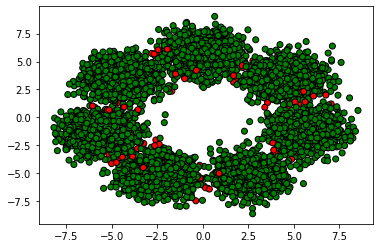

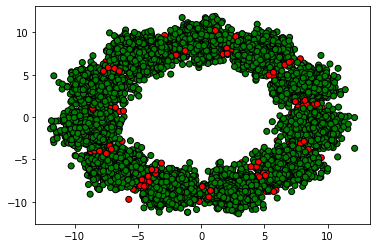

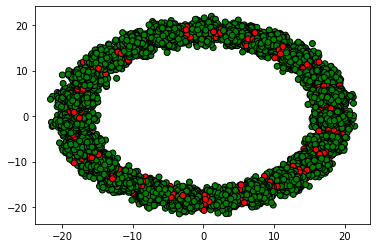

In [155]:
N = 1000
K1, K2, K3 = 7, 11 ,23
d = 5

plot_points(K1, N, d)
plot_points(K2, N, d)
plot_points(K3, N, d)

**Jak zależy frakcja punktów czerwonych od długości d? Jaka powinna
być wartość d, żeby punkty czerwone stanowiły około 10% wszystkich punktów danych?**

In [ ]:
def get_error(K, d)